In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
# folders = ["hpcc_noint","hpcc_normint","hpcc_tb","hpcc_pq","hpcc_tbpq"]
folders = ['noint', 'normint','tb','pq','tbpq','ovs_tb','ovs_pq','ovs_tbpq','ovspq_swtb','ovstb_swpq']
# folders = ['noint', 'normint','tb','pq','tbpq','ovs_pq','ovs_tb','ovs_tbpq']
folders.reverse()
# insert_noint = pd.read_csv("60minnointerference_separate/stats-per-run-INSERT.csv")

runs = {}

stringconv = lambda x : str(x)
conv = {2:stringconv}


for f in folders:
    run = None
    for i in range(10):
        if i == 0:
            run =  pd.read_csv(f+"/hpccoutf"+str(i)+".txt", skiprows=435, header=None, quotechar='"', skipinitialspace=True,sep="=",skipfooter=6)
        else:
            try:
                read = pd.read_csv(f+"/hpccoutf"+str(i)+".txt", skiprows=435, header=None, quotechar='"', skipinitialspace=True,sep="=",skipfooter=6)
                run[i+1] = read[1]
            except:
                print(f+"/hpccoutf"+str(i))

    runs[f] = run


C:\Users\jaspe\AppData\Local\Temp\ipykernel_5984\581194346.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  run =  pd.read_csv(f+"/hpccoutf"+str(i)+".txt", skiprows=435, header=None, quotechar='"', skipinitialspace=True,sep="=",skipfooter=6)
C:\Users\jaspe\AppData\Local\Temp\ipykernel_5984\581194346.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  read = pd.read_csv(f+"/hpccoutf"+str(i)+".txt", skiprows=435, header=None, quotechar='"', skipinitialspace=True,sep="=",skipfooter=6)


ovstb_swpq/hpccoutf9


In [3]:
conv_runs = {}
for f in folders:
    trans = runs[f].T
    head = trans.iloc[0]
    trans = trans[1:]
    trans.columns = head

    strcols = ["VersionRelease","LANG","HPL_cpfact","HPL_crfact","HPL_order"]
    for col in strcols:
        trans = trans.drop(col,1)
    trans = trans.apply(pd.to_numeric, errors='coerce')
    conv_runs[f] = trans

In [4]:
cols = list(conv_runs[folders[0]].columns)
col_runs = {}
for c in cols:
    data = pd.DataFrame()
    for f in folders:
        data[f] = conv_runs[f][c]
    col_runs[c] = data

In [5]:
    label_dict = {
            'noint':'No Interference',
            'normint':'Normally Distributed\nInterference',
            'tb':'Token Bucket on Switch',
            'pq':'Priority Queue on Switch',
            'tbpq':'Token Bucket & Priority Queue\non Switch',
            'ovs_tb':'Token Bucket on Host',
            'ovs_pq':'Priority Queue on Host',
            'ovs_tbpq':'Token Bucket & Priority Queue\non Host',
            'ovspq_swtb':'Priority Queue on Host\nToken Bucket on Switch',
            'ovstb_swpq':'Token Bucket on Host\nPriority Queue on Switch'
        }


In [6]:
xlabel = {
    'HPL_Tflops':'TFLOPS',
    'HPL_time':'Time (s)',
    'HPL_RnormI':'norm',
    'StarDGEMM_Gflops':'GFLOP/s',
    'SingleDGEMM_Gflops':'GFLOP/s',
    'PTRANS_GBs':'GB/s',
    'PTRANS_time':'Time (s)',
    'PTRANS_residual':'Residual',
    'MPIRandomAccess_LCG_time':'Time (s)',
    'MPIRandomAccess_LCG_CheckTime':'Time (s)',
    'MPIRandomAccess_LCG_GUPs':'GUP/s',
    'MPIRandomAccess_time':'Time (s)',
    'MPIRandomAccess_CheckTime':'Time (s)',
    'MPIRandomAccess_GUPs':'GUP/s',
    'StarRandomAccess_LCG_GUPs':'GUP/s',
    'SingleRandomAccess_LCG_GUPs':'GUP/s',
    'StarRandomAccess_GUPs':'GUP/s',
    'SingleRandomAccess_GUPs':'GUP/s',
    'StarSTREAM_Copy':'GB/s',
    'StarSTREAM_Scale':'GB/s',
    'StarSTREAM_Add':'GB/s',
    'StarSTREAM_Triad':'GB/s',
    'SingleSTREAM_Copy':'GB/s',
    'SingleSTREAM_Scale':'GB/s',
    'SingleSTREAM_Add':'GB/s',
    'SingleSTREAM_Triad':'GB/s',
    'StarFFT_Gflops':'GFLOP/s',
    'SingleFFT_Gflops':'GFLOP/s',
    'MPIFFT_Gflops':'GFLOP/s',
    'MaxPingPongLatency_usec':'Time (us)',
    'RandomlyOrderedRingLatency_usec':'Time (us)',
    'MinPingPongBandwidth_GBytes':'GB/s',
    'NaturallyOrderedRingBandwidth_GBytes':'GB/s',
    'RandomlyOrderedRingBandwidth_GBytes':'GB/s',
    'MinPingPongLatency_usec':'Time (us)',
    'AvgPingPongLatency_usec':'Time (us)',
    'MaxPingPongBandwidth_GBytes':'GB/s',
    'AvgPingPongBandwidth_GBytes':'GB/s',
    'NaturallyOrderedRingLatency_usec':'Time (us)',
    'MPIFFT_time0':'Time (s)',
    'MPIFFT_time1':'Time (s)',
    'MPIFFT_time2':'Time (s)',
    'MPIFFT_time3':'Time (s)',
    'MPIFFT_time4':'Time (s)',
    'MPIFFT_time5':'Time (s)',
    'MPIFFT_time6':'Time (s)'
}

In [7]:
title = {
    'HPL_Tflops':'HPL Execution Rate',
    'HPL_time':'HPL Time',
    'HPL_RnormI':'HPL RnormI',
    'StarDGEMM_Gflops':'DGEMM Star',
    'SingleDGEMM_Gflops':'DGEMM Single',
    'PTRANS_GBs':'PTRANS Bandwidth',
    'PTRANS_time':'PTRANS Time',
    'PTRANS_residual':'PTRANS Residual',
    'MPIRandomAccess_LCG_time':'MPI RandomAccess LCG Time',
    'MPIRandomAccess_LCG_CheckTime':'MPI RandomAccess LCG Check Time',
    'MPIRandomAccess_LCG_GUPs':'MPI RandomAccess LCG Updates',
    'MPIRandomAccess_time':'MPI RandomAccess Time',
    'MPIRandomAccess_CheckTime':'MPI RandomAccess Check Time',
    'MPIRandomAccess_GUPs':'MPI RandomAccess Updates',
    'StarRandomAccess_LCG_GUPs':'Star RandomAccess LCG',
    'SingleRandomAccess_LCG_GUPs':'Single RandomAccess LCG',
    'StarRandomAccess_GUPs':'Star RandomAccess',
    'SingleRandomAccess_GUPs':'Single RandomAccess',
    'StarSTREAM_Copy':'Star STREAM Copy',
    'StarSTREAM_Scale':'Star STREAM Scale',
    'StarSTREAM_Add':'Star STREAM Add',
    'StarSTREAM_Triad':'Star STREAM Triad',
    'SingleSTREAM_Copy':'Single STREAM Copy',
    'SingleSTREAM_Scale':'Single STREAM Scale',
    'SingleSTREAM_Add':'Single STREAM Add',
    'SingleSTREAM_Triad':'Single STREAM Triad',
    'StarFFT_Gflops':'Star FFT',
    'SingleFFT_Gflops':'Single FFT',
    'MPIFFT_Gflops':'MPI FFT',
    'MaxPingPongLatency_usec':'Max Ping-Pong Latency',
    'RandomlyOrderedRingLatency_usec':'Randomly Ordered Ring Latency',
    'MinPingPongBandwidth_GBytes':'Min Ping-Pong Bandwidth',
    'NaturallyOrderedRingBandwidth_GBytes':'Naturally Ordered Ring Bandwidth',
    'RandomlyOrderedRingBandwidth_GBytes':'Randomly Ordered Ring Bandwidth',
    'MinPingPongLatency_usec':'Min Ping-Pong Latency',
    'AvgPingPongLatency_usec':'Average Ping-Pong Latency',
    'MaxPingPongBandwidth_GBytes':'Max Ping-Pong Bandwidth',
    'AvgPingPongBandwidth_GBytes':'Average Ping-Pong Bandwidth',
    'NaturallyOrderedRingLatency_usec':'Naturally Ordered Ring Latency',
    'MPIFFT_time0':'FFT Time0',
    'MPIFFT_time1':'FFT Time1',
    'MPIFFT_time2':'FFT Time2',
    'MPIFFT_time3':'FFT Time3',
    'MPIFFT_time4':'FFT Time4',
    'MPIFFT_time5':'FFT Time5',
    'MPIFFT_time6':'FFT Time6'
}

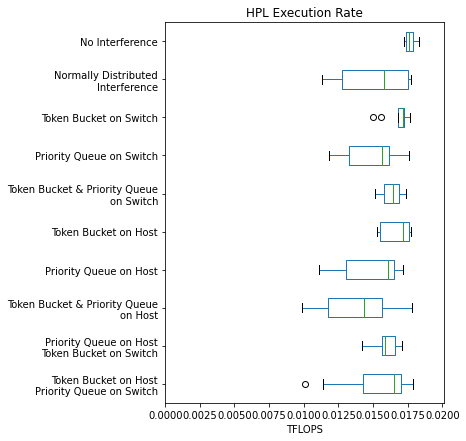

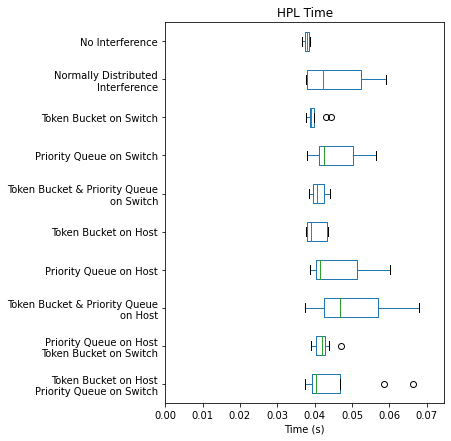

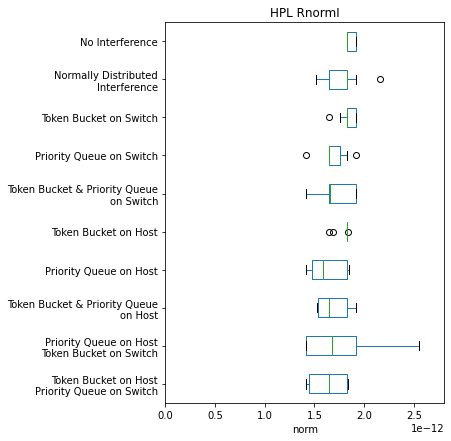

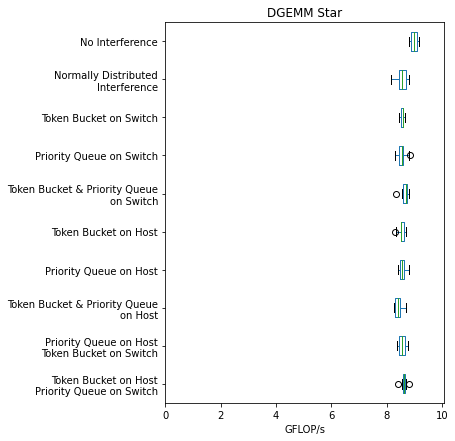

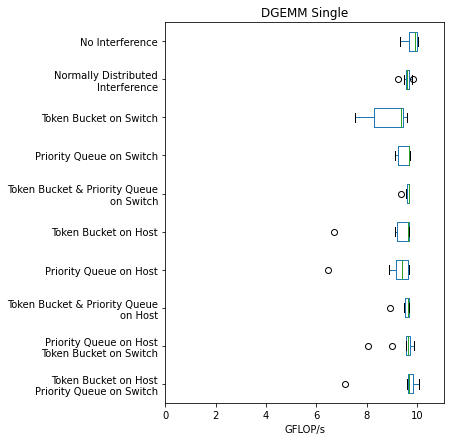

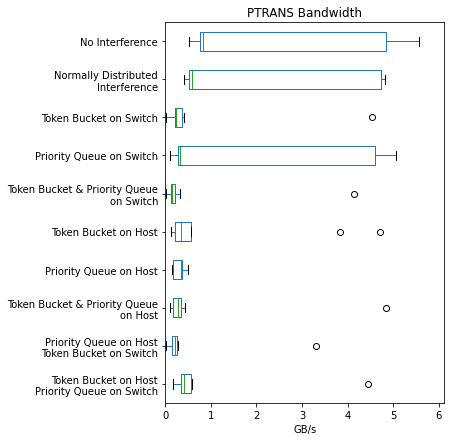

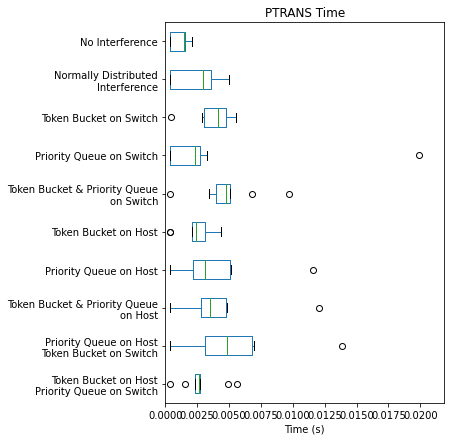

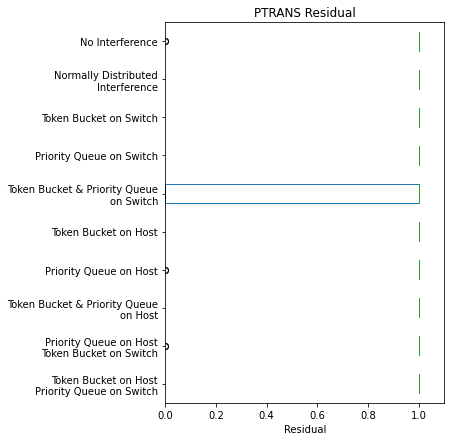

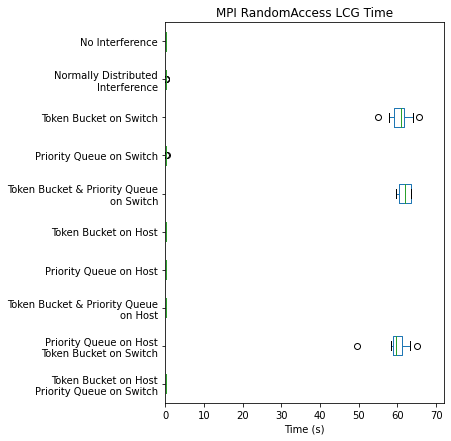

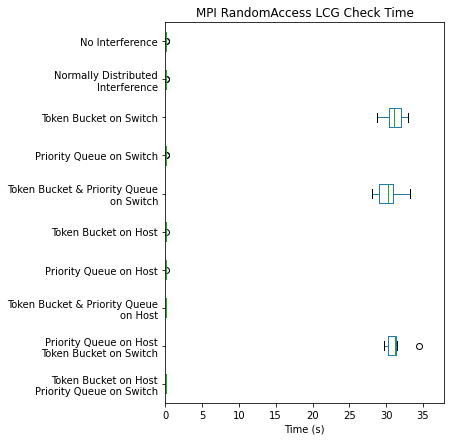

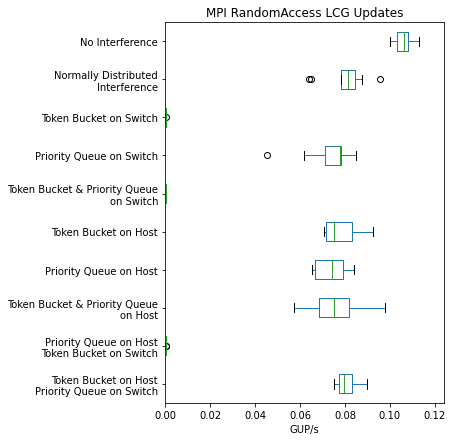

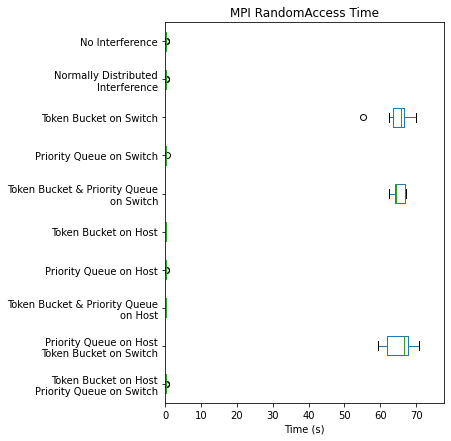

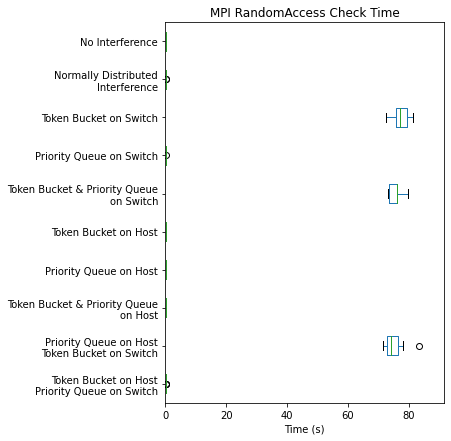

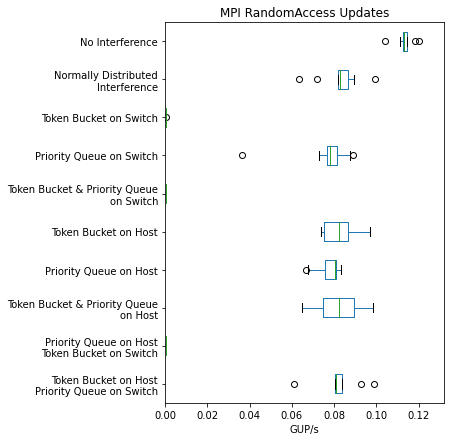

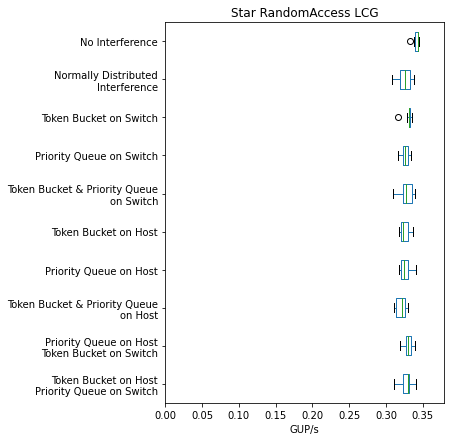

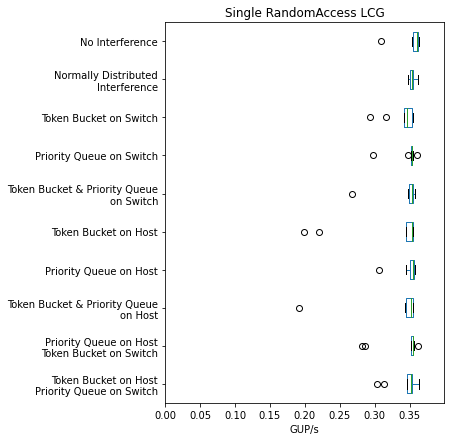

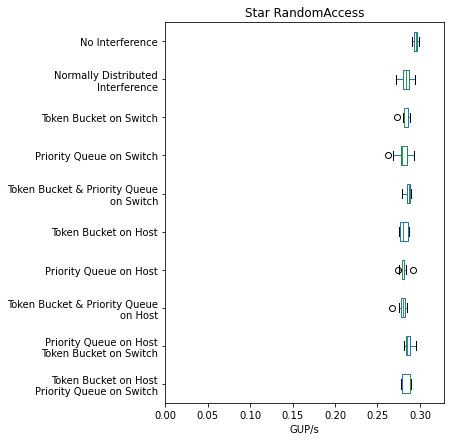

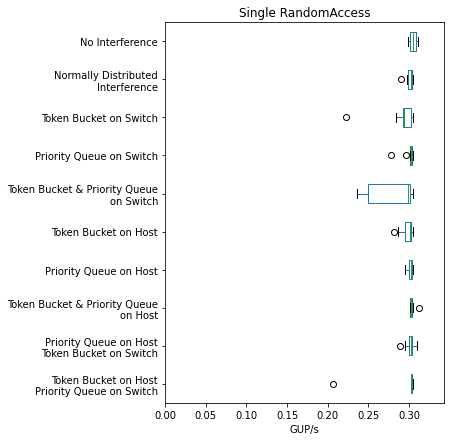

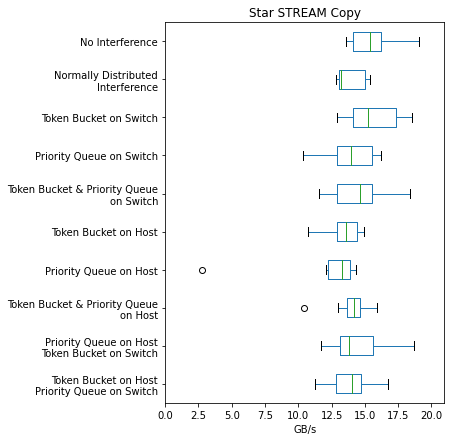

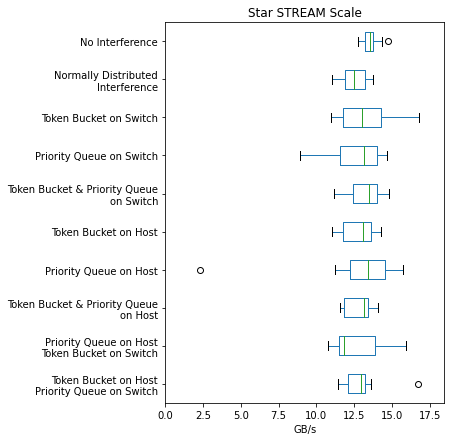

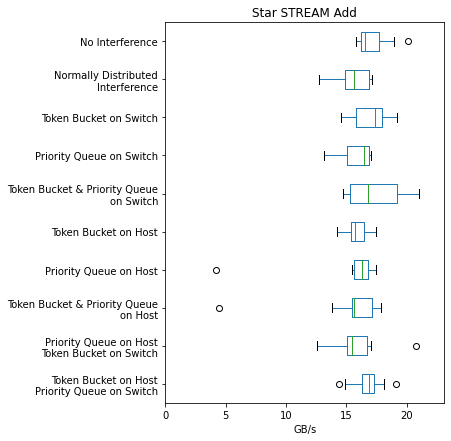

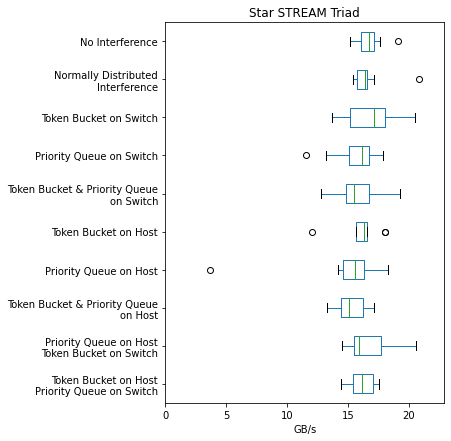

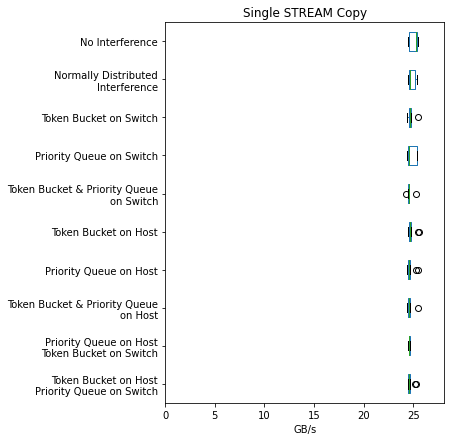

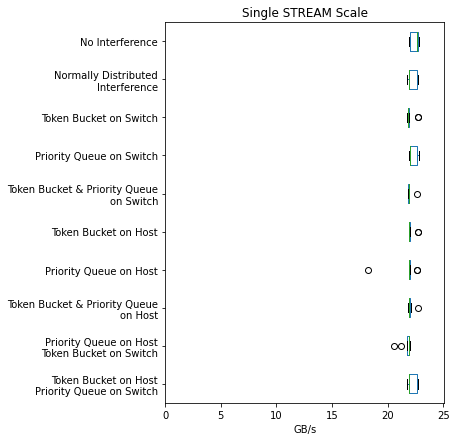

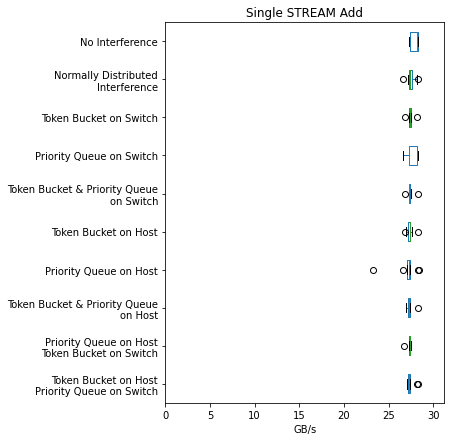

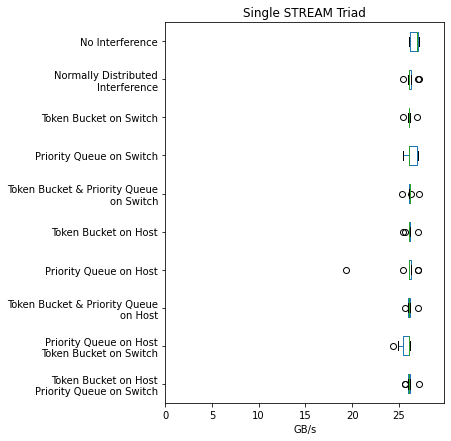

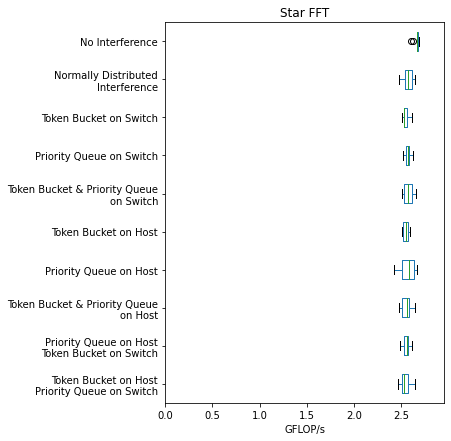

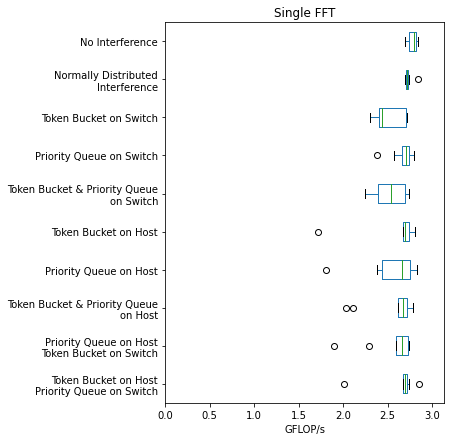

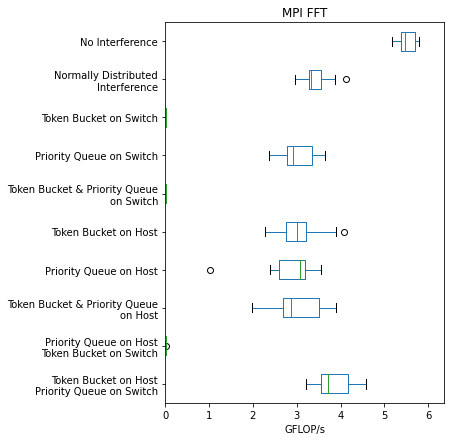

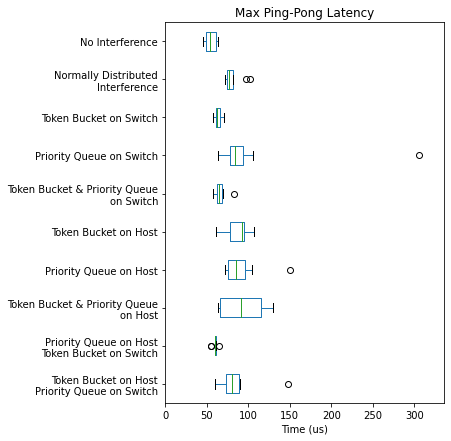

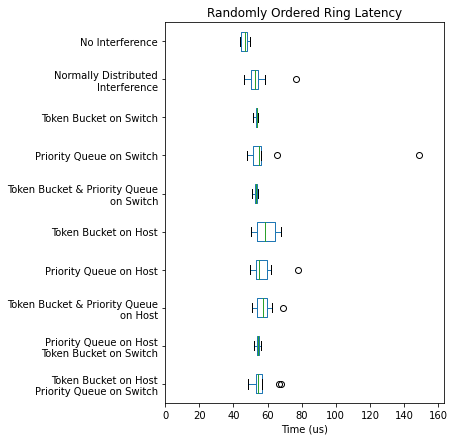

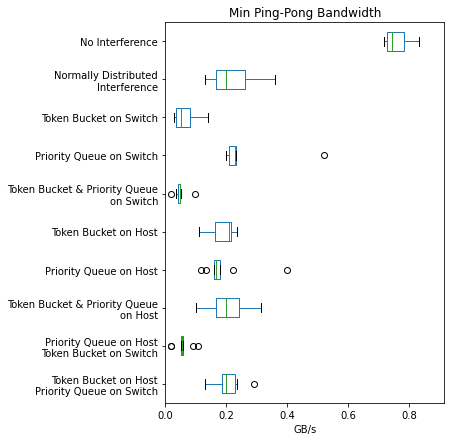

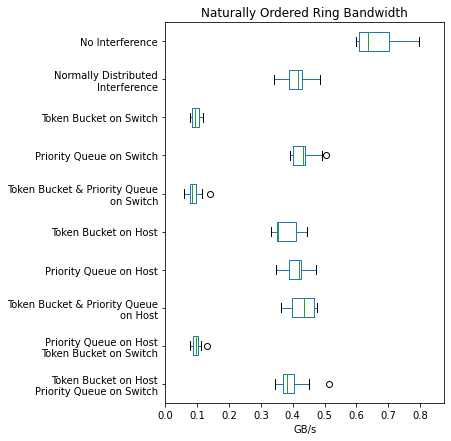

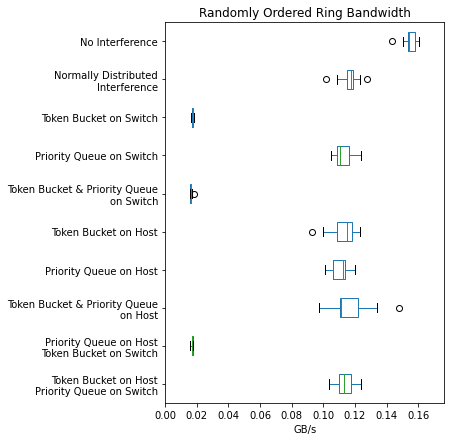

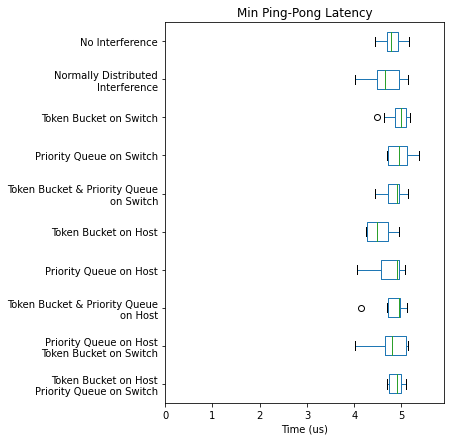

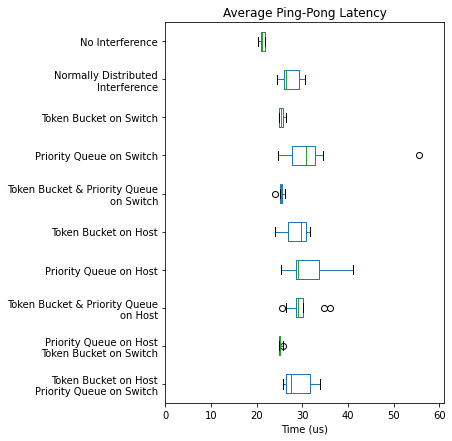

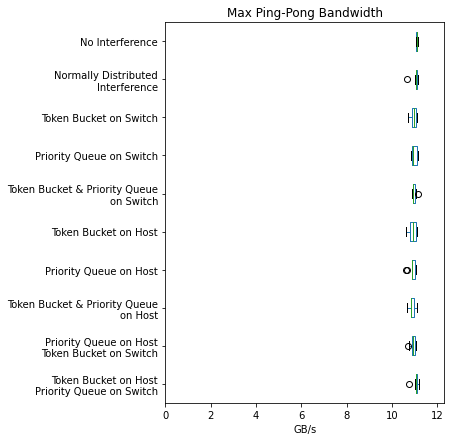

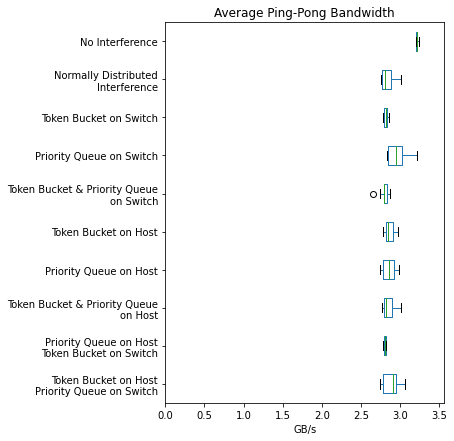

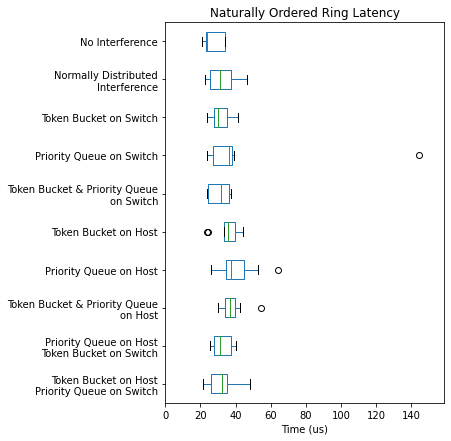

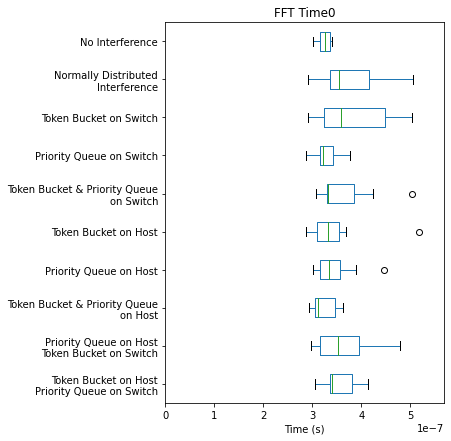

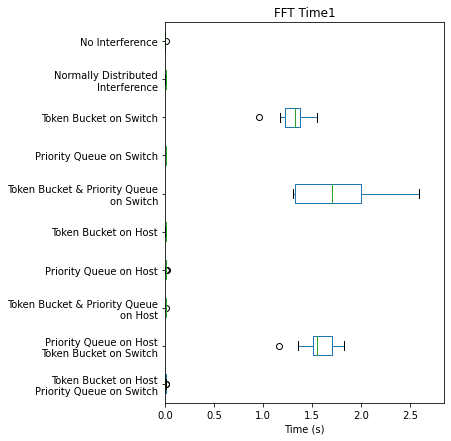

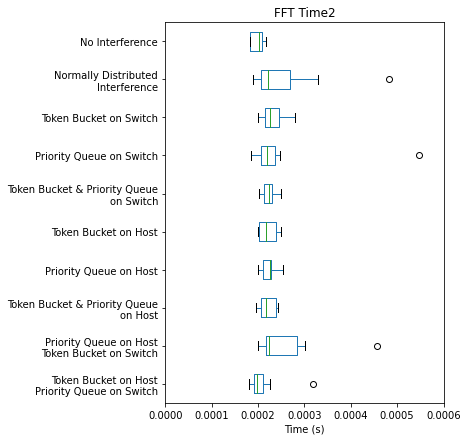

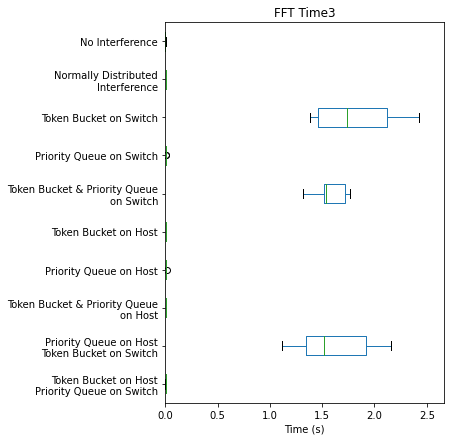

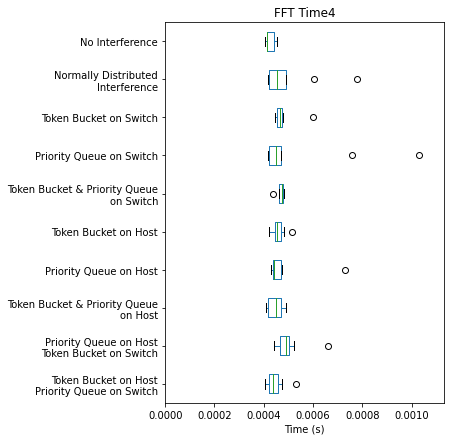

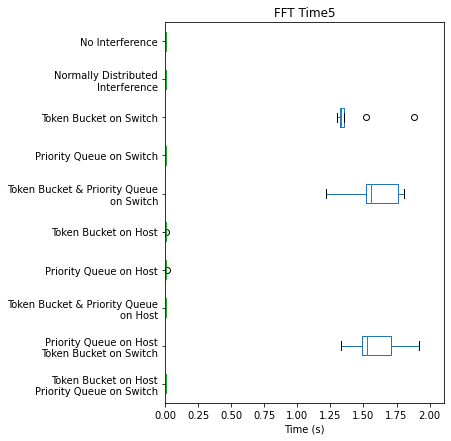

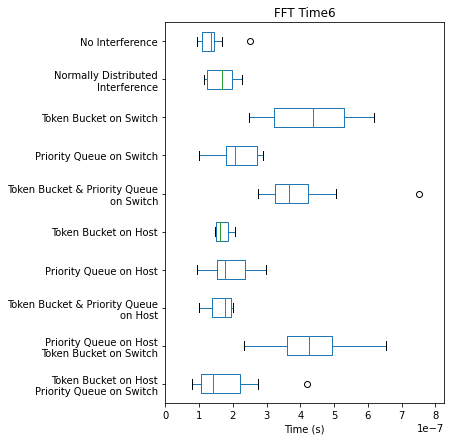

In [8]:
for c in cols:
    if(col_runs[c].min(numeric_only=True).min() == col_runs[c].max(numeric_only=True).max()):
        continue # skip all-equal boxplots as these generally contain settings, e.g. sizeof_float
    else:
        col_runs[c].rename(columns=label_dict, inplace=True)
        ax  = col_runs[c].boxplot(grid=False,rot=0,figsize=(5,7),vert=False)
        top = (col_runs[c].max(axis=1).max(axis=0))*1.1
        plt.title(title[c])
        ax.set_xlabel(xlabel[c])
        plt.xlim(left=0,right=top)
        
        plt.savefig(c+".png", bbox_inches="tight")
        plt.show()